<a href="https://colab.research.google.com/github/declan-healy/acoustic-resonant-chamber/blob/main/M2_Normal_modes_in_an_acoustic_chamber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!git clone "https://github.com/declan-healy/acoustic-resonant-chamber.git"

fatal: destination path 'acoustic-resonant-chamber' already exists and is not an empty directory.


In [94]:
%cd /content/acoustic-resonant-chamber/
!git pull "https://github.com/declan-healy/acoustic-resonant-chamber.git"

/content/acoustic-resonant-chamber
From https://github.com/declan-healy/acoustic-resonant-chamber
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
predicted = pd.read_csv("predicted.csv", nrows = 14)
predicted

,x,y,z,frequency
0,0,1,0,426.39
1,1,0,0,666.95
2,1,1,0,791.60
3,0,2,0,852.77
4,0,0,1,1078.03
5,1,2,0,1082.61
6,0,1,1,1159.29
7,1,0,1,1267.67
8,0,3,0,1279.16
9,2,0,0,1333.91


In [97]:
measured = pd.read_csv("measured.csv", nrows = 11, usecols = ['short', 'medium', 'long'])
measured

,short,medium,long
0,450,450,448
1,691,690,689
2,811,813,813
3,875,869,869
4,1106,1079,920
5,1183,1122,1105
6,1296,1284,1289
7,1347,1344,1346
8,1398,1386,1385
9,1425,1423,1422


In [98]:
short = pd.read_csv("short.csv", usecols = ['frequency', 'amplitude'])
short

,frequency,amplitude
0,1340.0,9.2
1,1342.5,8.8
2,1345.0,10.0
3,1347.5,9.6
4,1350.0,8.8
5,1352.5,6.0
6,1355.0,6.4
7,1356.0,7.2
8,1357.0,12.0
9,1357.5,14.8


In [99]:
medium = pd.read_csv("medium.csv", usecols = ['frequency', 'amplitude'])
medium

,frequency,amplitude
0,1340,9.6
1,1342,6.0
2,1342,8.6
3,1346,11.9
4,1347,7.0
5,1348,14.7
6,1348,6.4
7,1348,17.8
8,1349,21.4
9,1351,28.9


In [100]:
long = pd.read_csv("long.csv", usecols = ['frequency', 'amplitude'])
long

,frequency,amplitude
0,1320,9.2
1,1322,9.0
2,1325,10.2
3,1327,9.4
4,1329,8.8
5,1332,6.4
6,1332,7.0
7,1333,6.1
8,1337,11.8
9,1337,21.2


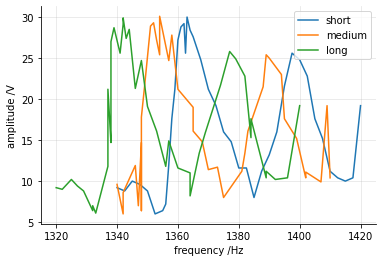

In [104]:
plt.plot(short['frequency'], short['amplitude'], label = 'short')
plt.plot(medium['frequency'], medium['amplitude'], label = 'medium')
plt.plot(long['frequency'], long['amplitude'], label = 'long')
plt.xlabel('frequency /Hz')
plt.ylabel('amplitude /V')
plt.grid(alpha=0.3)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [107]:
pip install uncertainties

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 4.6 MB/s 


In [108]:
import uncertainties as uc

In [119]:
#define constants
c = uc.ufloat(342.5, 0.6)
Lx = uc.ufloat(0.257, 0.001)
Ly = uc.ufloat(0.402, 0.001)
Lz = uc.ufloat(0.159, 0.001)

#import predicted frequencies with nx, ny and nz values
predicted = pd.read_csv("predicted.csv", nrows = 14)

#calculate errors using uncertainties package
predicted_err = c*(predicted['x']**2/Lx**2+predicted['y']**2/Ly**2+predicted['z']**2/Lz**2)**0.5/2
predicted_err

0      426.0+/-1.3
1      666.3+/-2.8
2      790.9+/-2.6
3      852.0+/-2.6
4         1077+/-7
5     1081.6+/-3.0
6         1158+/-7
7         1267+/-6
8         1278+/-4
9         1333+/-6
10        1336+/-6
11        1373+/-6
12        1399+/-6
13        1441+/-4
dtype: object